In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn import datasets 
boston = datasets.load_boston()
features = pd.DataFrame(boston.data,columns=boston.feature_names)
targets = boston.target

In [2]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
df = features

In [4]:
df.shape

(506, 13)

In [5]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [6]:
df_new = pd.DataFrame(targets)

In [7]:
df_new = df_new.rename(columns={0:"MEDV"})

In [8]:
df_new.columns

Index(['MEDV'], dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


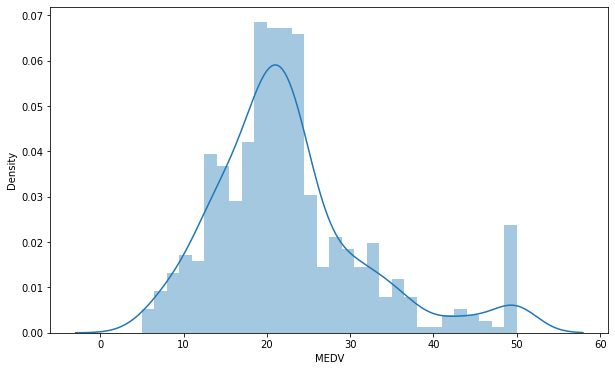

In [9]:
plt.figure(figsize=(10,6))
sns.distplot(df_new['MEDV'], bins=30)
plt.show()

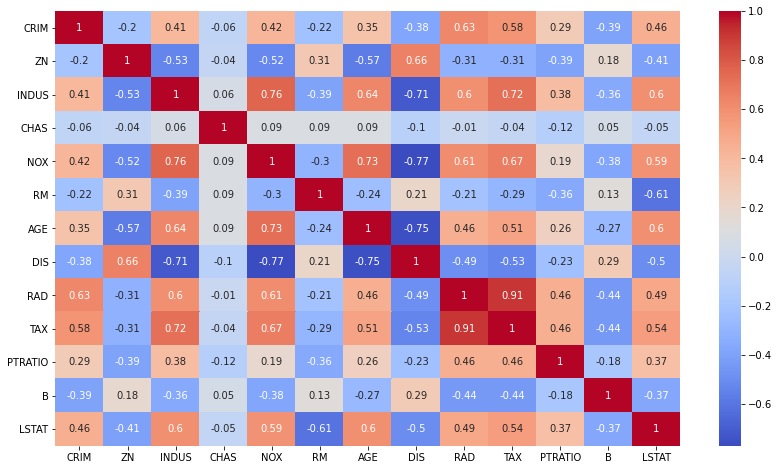

In [10]:
#Ploting heatap

plt.figure(figsize=(14,8))
corr_matrix = df.corr().round(2)
sns.heatmap(data=corr_matrix, cmap='coolwarm', annot=True)
plt.show()

In [11]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [12]:
df_new.isnull().sum()

MEDV    0
dtype: int64

In [13]:
# X_train, X_test, y_train, y_test = train_test_split(df, df_new, test_size=0.20, random_state=1)

In [13]:
df.shape

(506, 13)

In [14]:
result = pd.concat([df, df_new], axis=1)

In [15]:
result.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [16]:
result.shape

(506, 14)

In [17]:
SelectedColumns=['RM', 'PTRATIO','LSTAT', 'RAD', 'CHAS']

DataForML = df[SelectedColumns]

In [18]:
DataForML.head()

,RM,PTRATIO,LSTAT,RAD,CHAS
0,6.575,15.3,4.98,1.0,0.0
1,6.421,17.8,9.14,2.0,0.0
2,7.185,17.8,4.03,2.0,0.0
3,6.998,18.7,2.94,3.0,0.0
4,7.147,18.7,5.33,3.0,0.0


In [19]:
# DataForML.to_pickle('DataForML.pkl')

In [20]:
DataForML_numric = pd.get_dummies(DataForML)

In [21]:
DataForML_numric

,RM,PTRATIO,LSTAT,RAD,CHAS
0,6.575,15.3,4.98,1.0,0.0
1,6.421,17.8,9.14,2.0,0.0
2,7.185,17.8,4.03,2.0,0.0
3,6.998,18.7,2.94,3.0,0.0
4,7.147,18.7,5.33,3.0,0.0
...,...,...,...,...,...
501,6.593,21.0,9.67,1.0,0.0
502,6.120,21.0,9.08,1.0,0.0
503,6.976,21.0,5.64,1.0,0.0
504,6.794,21.0,6.48,1.0,0.0


In [22]:
DataForML_numric = pd.get_dummies(DataForML)

DataForML_numric['MEDV'] = result['MEDV']

DataForML_numric.head()

,RM,PTRATIO,LSTAT,RAD,CHAS,MEDV
0,6.575,15.3,4.98,1.0,0.0,24.0
1,6.421,17.8,9.14,2.0,0.0,21.6
2,7.185,17.8,4.03,2.0,0.0,34.7
3,6.998,18.7,2.94,3.0,0.0,33.4
4,7.147,18.7,5.33,3.0,0.0,36.2


In [23]:
DataForML_numric.columns

Index(['RM', 'PTRATIO', 'LSTAT', 'RAD', 'CHAS', 'MEDV'], dtype='object')

In [24]:
X = DataForML_numric.drop(columns=['MEDV'])

In [25]:
X.head()

,RM,PTRATIO,LSTAT,RAD,CHAS
0,6.575,15.3,4.98,1.0,0.0
1,6.421,17.8,9.14,2.0,0.0
2,7.185,17.8,4.03,2.0,0.0
3,6.998,18.7,2.94,3.0,0.0
4,7.147,18.7,5.33,3.0,0.0


In [26]:
X.shape

(506, 5)

In [27]:
y = DataForML_numric.drop(columns=['RM', 'PTRATIO', 'LSTAT', 'RAD', 'CHAS'])

In [28]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [29]:
y.shape

(506, 1)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [31]:
X_train.shape

(354, 5)

In [32]:
X_test.shape

(152, 5)

In [33]:
y_train.shape

(354, 1)

In [34]:
y_test.shape

(152, 1)

In [52]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

pre_scaler = MinMaxScaler()

pre_scaler_fit = pre_scaler.fit(X)

X = pre_scaler_fit.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=5)

In [53]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 5)
(152, 5)
(354, 1)
(152, 1)


In [57]:
X_df = pd.DataFrame(X)

In [58]:
X_df.head()

,0,1,2,3,4
0,0.577505,0.287234,0.089680,0.000000,0.0
1,0.547998,0.553191,0.204470,0.043478,0.0
2,0.694386,0.553191,0.063466,0.043478,0.0
3,0.658555,0.648936,0.033389,0.086957,0.0
4,0.687105,0.648936,0.099338,0.086957,0.0


In [36]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth=4, n_estimators=400, criterion='mse')

print(model)

RandomForestRegressor(max_depth=4, n_estimators=400)


In [37]:
rf = model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [38]:
pred = rf.predict(X_test)

In [39]:
from sklearn import metrics

print("R2 value ", metrics.r2_score(y_train, rf.predict(X_train)))

R2 value  0.8832328703354256


In [30]:
import pickle

# pickle.dump(rf, open("boston_house.pickle", "wb"))


In [31]:
new_model = pickle.load(open("boston_house.pickle", "rb"))

In [32]:
new_model.predict([[6.575, 15.3, 4.98, 1.0, 0.0]])

array([20.80119159])

In [33]:
new_model.predict([[6.421, 17.8, 9.14, 2.0, 0.0]])

array([20.80119159])

In [34]:
new_model.predict([[6.575, 15.3, 4.98, 1.0, 0.0]])

array([20.80119159])

In [29]:
# df.head()
DataForML_numric.head()

,RM,PTRATIO,LSTAT,RAD,CHAS,MEDV
0,6.575,15.3,4.98,1.0,0.0,24.0
1,6.421,17.8,9.14,2.0,0.0,21.6
2,7.185,17.8,4.03,2.0,0.0,34.7
3,6.998,18.7,2.94,3.0,0.0,33.4
4,7.147,18.7,5.33,3.0,0.0,36.2


In [28]:
DataForML.head()

,RM,PTRATIO,LSTAT,RAD,CHAS
0,6.575,15.3,4.98,1.0,0.0
1,6.421,17.8,9.14,2.0,0.0
2,7.185,17.8,4.03,2.0,0.0
3,6.998,18.7,2.94,3.0,0.0
4,7.147,18.7,5.33,3.0,0.0


In [65]:
X.head()

,RM,PTRATIO,LSTAT,RAD,CHAS
0,6.575,15.3,4.98,1.0,0.0
1,6.421,17.8,9.14,2.0,0.0
2,7.185,17.8,4.03,2.0,0.0
3,6.998,18.7,2.94,3.0,0.0
4,7.147,18.7,5.33,3.0,0.0


In [66]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [68]:
X_train.head()

,RM,PTRATIO,LSTAT,RAD,CHAS
220,6.951,17.4,9.71,8.0,1.0
71,5.961,19.2,9.88,4.0,0.0
240,6.897,16.6,11.38,6.0,0.0
6,6.012,15.2,12.43,5.0,0.0
417,5.304,20.2,26.64,24.0,0.0


In [71]:
y_train.shape

(404, 1)

In [72]:
X_train.shape

(404, 5)

In [73]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor()

In [74]:
y_pred = reg.predict(X_train)

In [75]:
print("Training Accuracy: ", reg.score(X_train, y_train)*100)

Training Accuracy:  97.76652172053


In [76]:
print("Test Accuracy: ", reg.score(X_test, y_test)*100)

Test Accuracy:  64.93786127595705


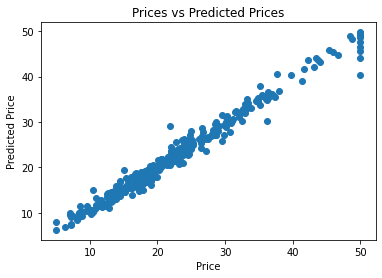

In [80]:
import matplotlib.pyplot as plt

plt.scatter(y_train, y_pred)
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.title("Prices vs Predicted Prices")
plt.show()

In [81]:
model = RandomForestRegressor(max_depth=4, n_estimators=400, criterion='mse')

rf = model.fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [82]:
pred = rf.predict(X_test)

In [83]:
from sklearn import metrics

print("R2 value ", metrics.r2_score(y_train, rf.predict(X_train)))

R2 value  0.9116850505847396


In [1]:
import pickle

# pickle.dump(rf, open("boston_house_one.pickle", "wb"))

In [2]:
new_model = pickle.load(open("boston_house_one.pickle", "rb"))

In [4]:
re = new_model.predict([[6.575, 15.3, 4.98, 1.0, 0.0]])

In [5]:
rf.score(X_test, y_test)

NameError: name 'rf' is not defined

In [6]:
re

array([26.22866146])

In [10]:
round(re[0], 2)

26.23